# Real State Analisys

Analysis of Real State Market

### Import Dependencies

In [1]:
import os
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd
import time
import numpy as np
import pprint
import datetime

# Import DB user and password
from api_keys import positionstack_key
from api_keys import opencagedata_API
from api_keys import DATABASE_URL

In [2]:
 # Imports the method used to connect to DBs
from sqlalchemy import create_engine
from sqlalchemy import exc
from sqlalchemy import update

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# function to establish a session with a connected database
from sqlalchemy.orm import Session

# database compliant datatypes
from sqlalchemy import Column, Integer, String, Float, ForeignKey, DateTime

# from config import db_user, dialect

In [3]:
# Create database connection
engine = create_engine(DATABASE_URL) 

<hr style="border: 3px solid red;">

### Basic Analysis

In [4]:
# Query database using pandas
SQL_Query_df = pd.read_sql_query('''select * from realstatelisting''', engine)

In [5]:
SQL_Query_df.describe()

,house_id,price,bed,bath,sqft,lot,latitude,longitude
count,459.000000,459.000000,459.000000,459.000000,459.000000,400.000000,459.000000,459.000000
mean,240.061002,242377.004357,3.376906,2.249455,1936.727669,7276.375000,29.793736,-95.400350
std,142.476354,53575.143662,0.657166,0.478095,531.384656,5488.248201,0.129734,0.160713
min,1.000000,150000.000000,1.000000,1.000000,782.000000,1406.000000,29.546100,-95.717766
25%,118.500000,197499.500000,3.000000,2.000000,1571.000000,4987.500000,29.695442,-95.521471
50%,233.000000,235000.000000,3.000000,2.000000,1841.000000,6825.000000,29.780066,-95.387125
75%,367.500000,287487.500000,4.000000,2.500000,2245.000000,8461.750000,29.886830,-95.279514
max,489.000000,350000.000000,6.000000,4.000000,3669.000000,87120.000000,30.087071,-95.096904


In [6]:
SQL_Query_df.head(2)

,house_id,address,price,bed,bath,sqft,lot,latitude,longitude,house_link,image_1,image_2,map_link,google_map,created_date
0,173,"308 Avenue of Oaks St, Houston, TX 77009",319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://www.openstreetmap.org/?mlat=29.8113709...,https://www.google.com/maps/place/308+Avenue+o...,2021-01-10 21:13:15.025962
1,174,"7911 Napawood Ct, Houston, TX 77088",199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://www.openstreetmap.org/?mlat=29.8806332...,https://www.google.com/maps/place/7911+Napawoo...,2021-01-10 21:13:15.139330


Text(0, 0.5, 'price')

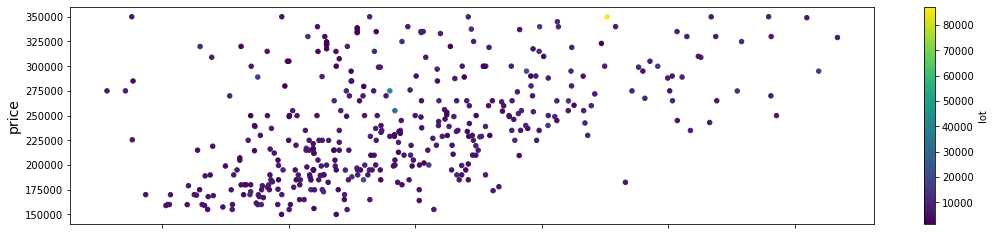

In [7]:
ax1 = SQL_Query_df.plot.scatter(x='sqft',y='price',c='lot', colormap='viridis',figsize=(18,4))
ax1.set_xlabel("sqft", fontsize=14)
ax1.set_ylabel("price", fontsize=14)

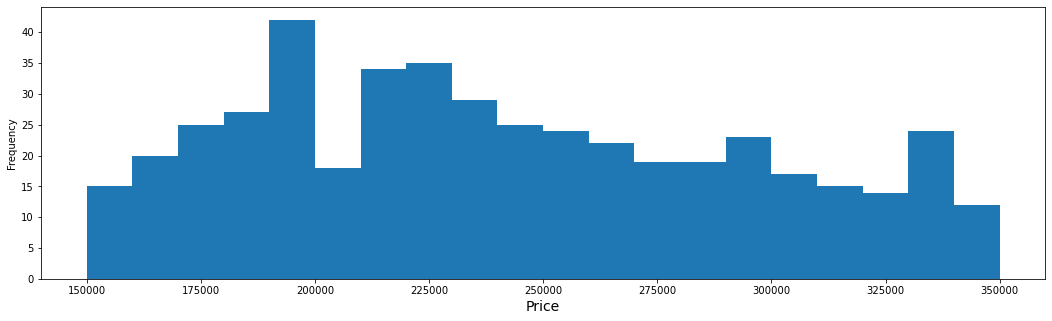

In [14]:
ax1 = SQL_Query_df['price'].plot(kind='hist',bins=20,figsize=(18,5));
ax1.set_xlabel("Price", fontsize=14);

Text(0, 0.5, 'longitude')

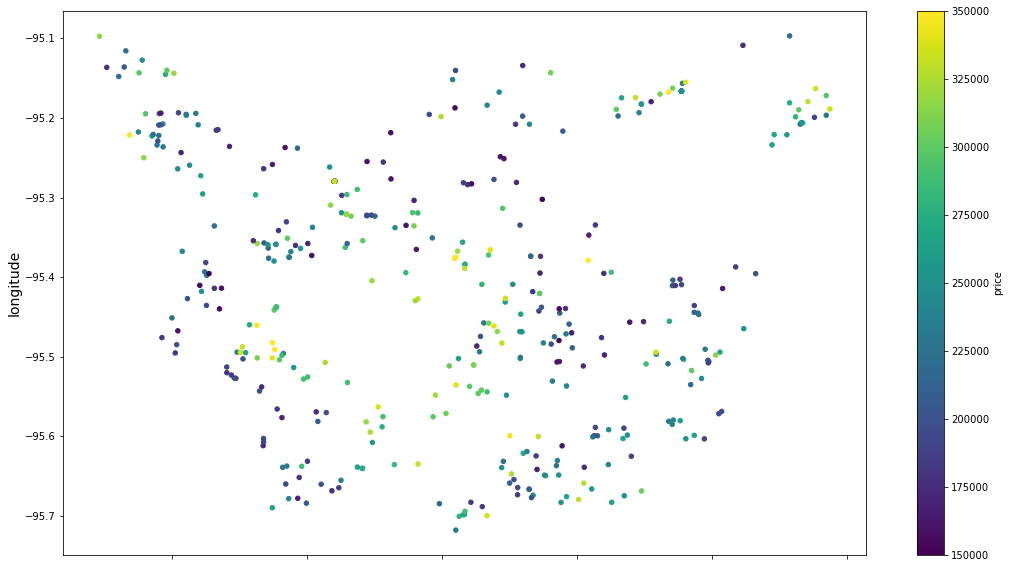

In [9]:
ax1 = SQL_Query_df.plot.scatter(x='latitude',y='longitude',c='price', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("latitude", fontsize=14)
ax1.set_ylabel("longitude", fontsize=14)